In [8]:
# ипрортируем библиотеки

import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [9]:
# загружаем набор данных
Pogoda = pd.read_excel('C://Users/alex1/Downloads/Pogoda (1).xlsx')
DataDTPкор = pd.read_excel('C://Users/alex1/Downloads/DataDTPкор (1).xlsx')

merged_df = pd.merge(Pogoda, DataDTPкор, on='join_key')
#Посмотрел датафрейм
merged_df.head()

,join_key,datetime_x,year,month,region_x,temperature,atmospheric pressure,humidity,Direction of the wind,Wind speed,...,pogoda_region,region_y,address,category,datetime_y,severity,dead_count,injured_count,parent_region,participants_count
0,Восток42736,2017-01-01 00:00:00,2017,1,Восток,0.9,755.2,96.0,ЗЮЗ,1.0,...,Восток,Перово,"г Москва, ш Энтузиастов, 40",Столкновение,2016-12-31 22:50:00,Легкий,0,2,Москва,3
1,"Восток42736,75",2017-01-01 18:00:00,2017,1,Восток,1.7,751.0,96.0,ЗЮЗ,1.0,...,Восток,Ивановское,"г Москва, ул Молостовых, 4к4",Наезд на пешехода,2017-01-01 18:30:00,Легкий,0,1,Москва,2
2,"Восток43101,125",2018-01-01 03:00:00,2018,1,Восток,1.1,761.2,80.0,"Штиль, безветрие",0.0,...,Восток,Гольяново,"г Москва, ул Камчатская, 6к2",Наезд на пешехода,2018-01-01 02:40:00,Тяжёлый,0,1,Москва,2
3,"Восток43101,25",2018-01-01 06:00:00,2018,1,Восток,0.2,761.3,90.0,"Штиль, безветрие",0.0,...,Восток,Восточное Измайлово,"г Москва, Московская кольцевая автомобильная д...",Столкновение,2018-01-01 06:50:00,Легкий,0,1,Москва,3
4,"Восток43101,375",2018-01-01 09:00:00,2018,1,Восток,1.3,760.9,83.0,Ю,1.0,...,Восток,Новокосино,"г Москва, ул Новокосинская, 15",Столкновение,2018-01-01 08:05:00,Легкий,0,1,Москва,3


In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35020 entries, 0 to 35019
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   join_key               35020 non-null  object        
 1   datetime_x             35020 non-null  object        
 2   year                   35020 non-null  int64         
 3   month                  35020 non-null  int64         
 4   region_x               35020 non-null  object        
 5   temperature            35015 non-null  float64       
 6   atmospheric pressure   35019 non-null  float64       
 7   humidity               35013 non-null  float64       
 8   Direction of the wind  35020 non-null  object        
 9   Wind speed             35016 non-null  float64       
 10  cloudiness             35020 non-null  float64       
 11  weather conditions     27106 non-null  object        
 12  datetime_round         35020 non-null  datetime64[ns]
 13  i

In [155]:
merged_df.shape

(35020, 26)

In [10]:
merged_df = merged_df.drop_duplicates()
merged_df.shape

(35015, 26)

<AxesSubplot: >

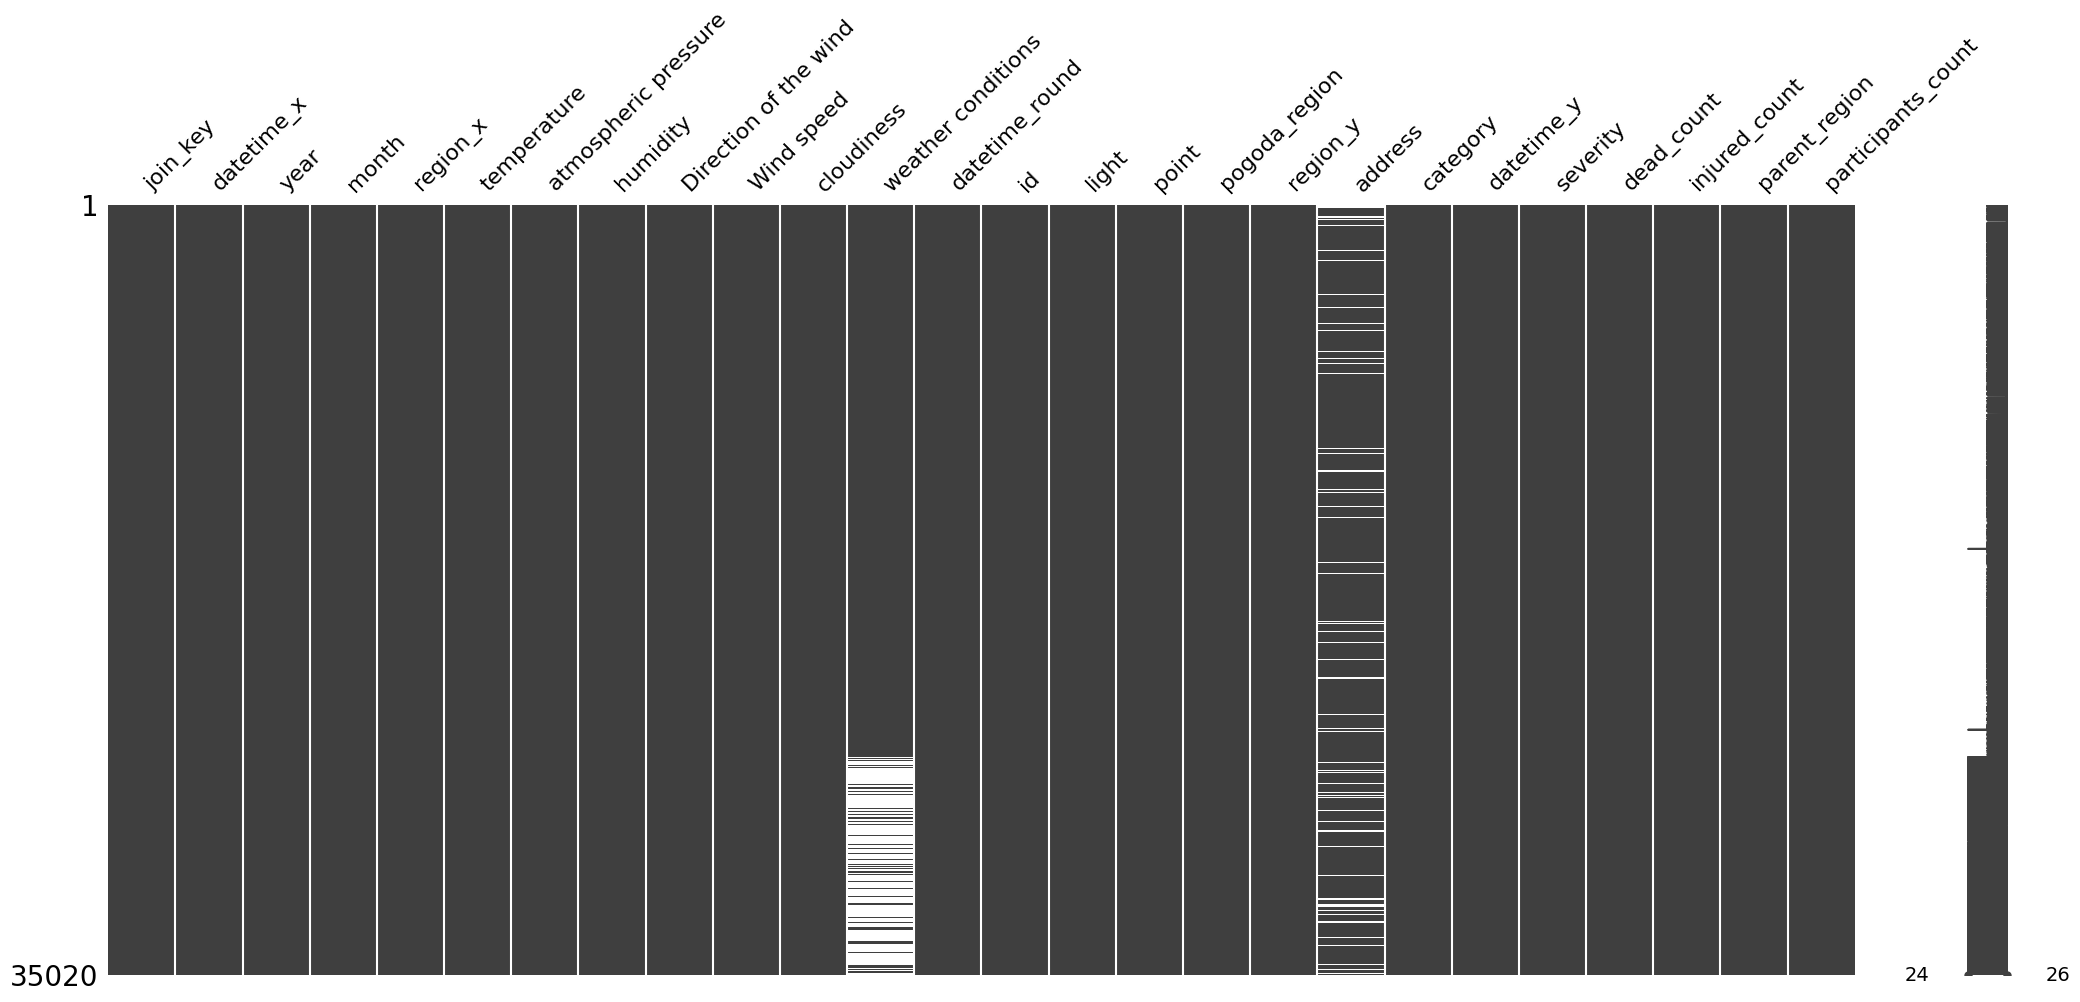

In [27]:
msn.matrix(merged_df)
#построил матрицу Null значений

In [5]:
merged_df.columns

Index(['join_key', 'datetime_x', 'year', 'month', 'region_x', 'temperature',
       'atmospheric pressure', 'humidity', 'Direction of the wind',
       'Wind speed', 'cloudiness', 'weather conditions', 'datetime_round',
       'id', 'light', 'point', 'pogoda_region', 'region_y', 'address',
       'category', 'datetime_y', 'severity', 'dead_count', 'injured_count',
       'parent_region', 'participants_count'],
      dtype='object')

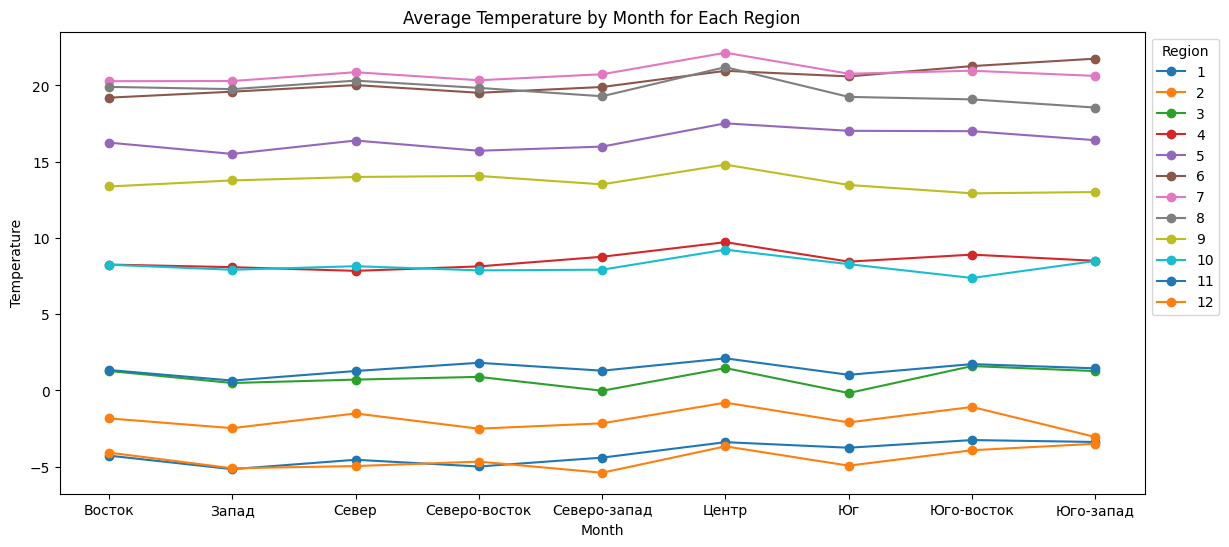

In [3]:
grouped_data = merged_df.groupby(['region_x', 'month'])['temperature'].mean().unstack()

fig, ax = plt.subplots(figsize=(14, 6))
grouped_data.plot(kind='line', marker='o', ax = ax)
plt.title('Average Temperature by Month for Each Region')
plt.xlabel('Month')

plt.ylabel('Temperature')
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.show()
#  График температуры по месяцам для каждого региона

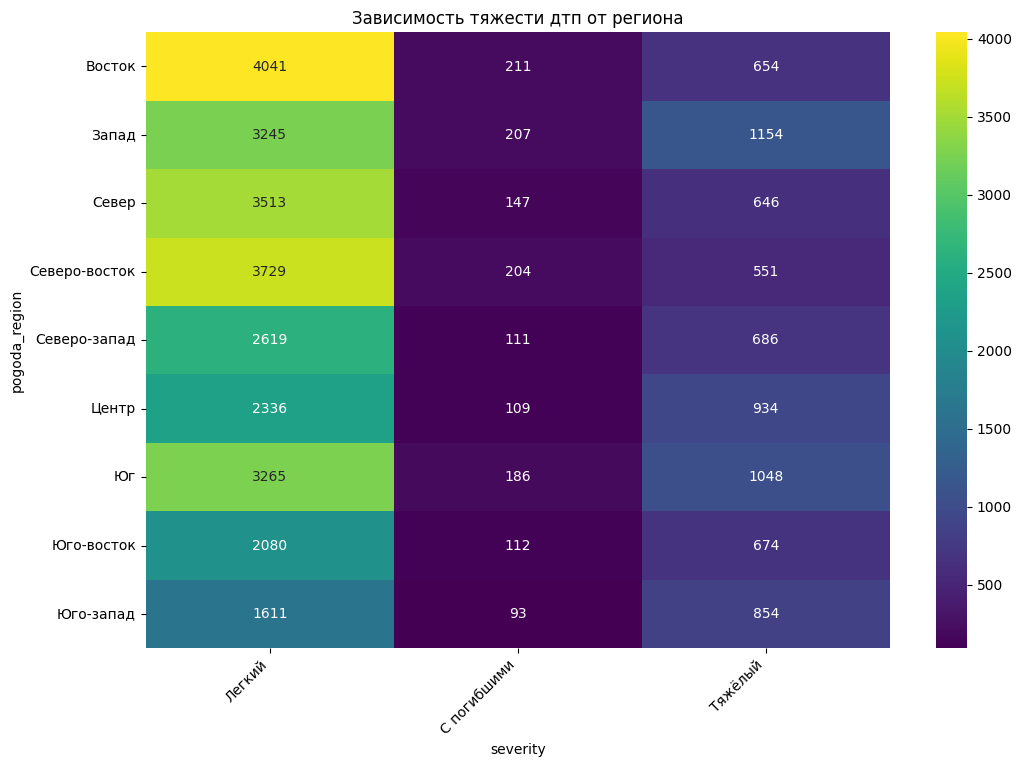

In [99]:
pivot_table = pd.crosstab(merged_df['pogoda_region'], merged_df['severity'])

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='g')
plt.title('Зависимость тяжести дтп от региона')
plt.xticks(rotation=45, ha='right')
plt.show()

#матрица корреляции зависимости severity от region

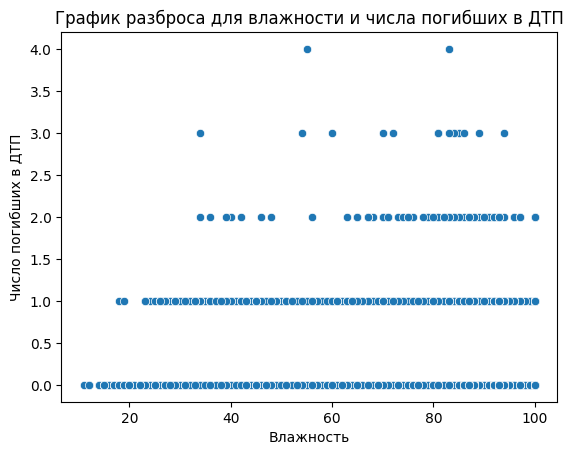

In [4]:
sns.scatterplot(data=merged_df, x='humidity', y='dead_count')

# Настройка осей и заголовка
plt.xlabel('Влажность')
plt.ylabel('Число погибших в ДТП')
plt.title('График разброса для влажности и числа погибших в ДТП')

# Отображение графика
plt.show()

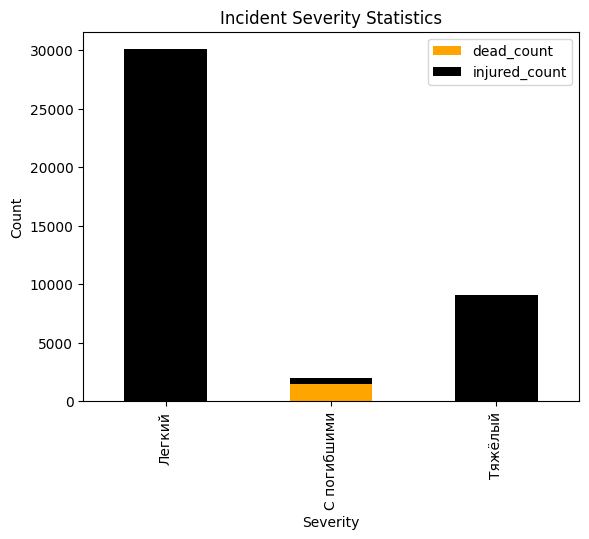

In [6]:
# Статистика по количеству пострадавших и погибших в происшествиях
incident_stats = merged_df.groupby('severity')['join_key'].count()
incident_stats.plot(kind='bar', stacked=True,color=['orange', 'black'] )
plt.title('Incident Severity Statistics')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

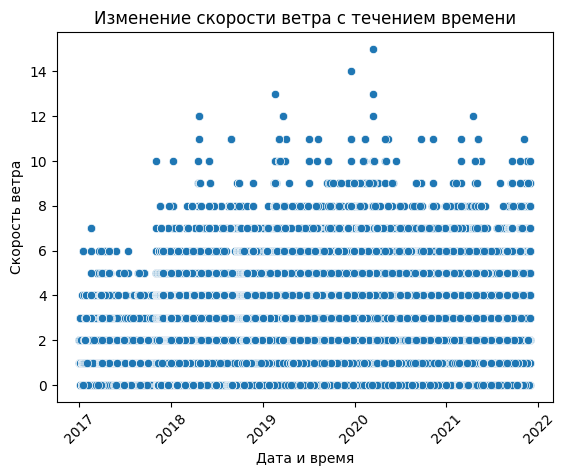

In [70]:
datetime_x = merged_df['datetime_x']
wind_speed = merged_df['Wind speed']

# Создание линейного графика
sns.scatterplot(data=merged_df, x='datetime_x', y='Wind speed')

# Настройка осей и заголовка графика
plt.xlabel('Дата и время')
plt.ylabel('Скорость ветра')
plt.title('Изменение скорости ветра с течением времени')

# Поворот меток по оси X для более удобного чтения
plt.xticks(rotation=45)

# Отображение графика
plt.show()

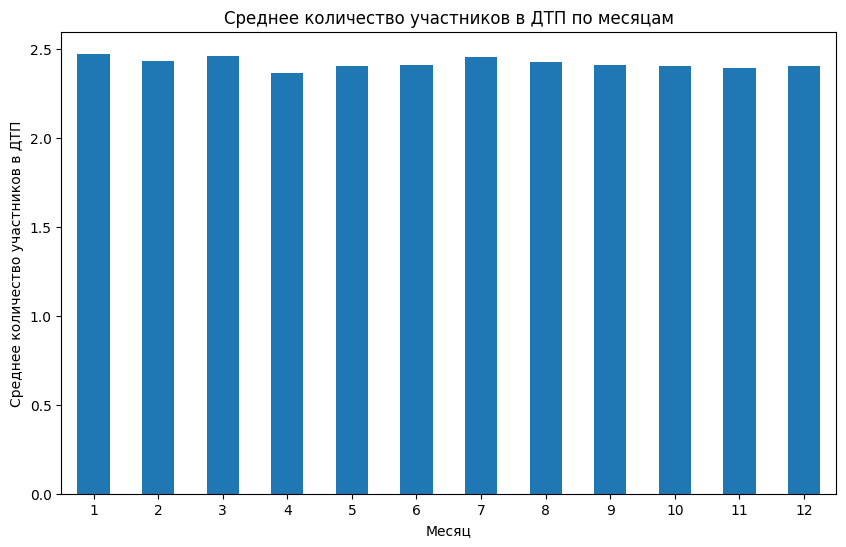

In [6]:
mean_participants = merged_df.groupby('month')['participants_count'].mean()

# Создание графика
plt.figure(figsize=(10, 6))
mean_participants.plot(kind='bar')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество участников в ДТП')
plt.title('Среднее количество участников в ДТП по месяцам')
plt.xticks(rotation=0)
plt.show()

In [31]:
merged_df['category'].unique()

array(['Столкновение', 'Наезд на пешехода', 'Наезд на препятствие',
       'Наезд на стоящее ТС', 'Опрокидывание', 'Наезд на велосипедиста',
       'Падение пассажира',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ',
       'Отбрасывание предмета',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность',
       'Иной вид ДТП', 'Наезд на внезапно возникшее препятствие',
       'Съезд с дороги', 'Падение груза',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы',
       'Наезд на гужевой транспорт', 'Наезд на животное',
       'Возгорание вследствие технической неисправности движущегося или остановившегося ТС, участвующего в дорожном движении.'],
      dtype=object)

In [36]:
merged_df.describe()

,year,month,temperature,atmospheric pressure,humidity,Wind speed,cloudiness,id,dead_count,injured_count,participants_count
count,35020.000000,35020.000000,35015.000000,35019.000000,35013.000000,35016.000000,35020.000000,3.502000e+04,35020.000000,35020.000000,35020.000000
mean,2019.110223,6.869046,8.529564,761.728639,70.503499,1.994203,0.646461,1.844319e+06,0.042376,1.132667,2.420246
std,1.352012,3.413235,10.570640,7.688310,20.074587,1.750378,0.403063,4.615857e+05,0.218188,0.579735,0.891117
min,2017.000000,1.000000,-27.700000,724.700000,11.000000,0.000000,0.000000,1.527478e+06,0.000000,0.000000,1.000000
25%,2018.000000,4.000000,0.800000,756.900000,56.000000,1.000000,0.250000,1.542545e+06,0.000000,1.000000,2.000000
50%,2019.000000,7.000000,8.000000,761.600000,75.000000,2.000000,0.750000,1.558604e+06,0.000000,1.000000,2.000000
75%,2020.000000,10.000000,17.200000,766.600000,87.000000,3.000000,1.000000,2.498059e+06,0.000000,1.000000,3.000000
max,2021.000000,12.000000,35.100000,787.900000,100.000000,15.000000,1.000000,2.648998e+06,4.000000,19.000000,20.000000


In [11]:
merged_df['datetime_x'] = pd.to_datetime(merged_df['datetime_x'], format='%y%m%d')
dark_twilight_incidents = merged_df.copy()
dark_twilight_incidents = dark_twilight_incidents[dark_twilight_incidents['light'] != 'Светлое время суток']
dark_twilight_incidents.head()

,join_key,datetime_x,year,month,region_x,temperature,atmospheric pressure,humidity,Direction of the wind,Wind speed,...,pogoda_region,region_y,address,category,datetime_y,severity,dead_count,injured_count,parent_region,participants_count
0,Восток42736,2017-01-01 00:00:00,2017,1,Восток,0.9,755.2,96.0,ЗЮЗ,1.0,...,Восток,Перово,"г Москва, ш Энтузиастов, 40",Столкновение,2016-12-31 22:50:00,Легкий,0,2,Москва,3
1,"Восток42736,75",2017-01-01 18:00:00,2017,1,Восток,1.7,751.0,96.0,ЗЮЗ,1.0,...,Восток,Ивановское,"г Москва, ул Молостовых, 4к4",Наезд на пешехода,2017-01-01 18:30:00,Легкий,0,1,Москва,2
2,"Восток43101,125",2018-01-01 03:00:00,2018,1,Восток,1.1,761.2,80.0,"Штиль, безветрие",0.0,...,Восток,Гольяново,"г Москва, ул Камчатская, 6к2",Наезд на пешехода,2018-01-01 02:40:00,Тяжёлый,0,1,Москва,2
3,"Восток43101,25",2018-01-01 06:00:00,2018,1,Восток,0.2,761.3,90.0,"Штиль, безветрие",0.0,...,Восток,Восточное Измайлово,"г Москва, Московская кольцевая автомобильная д...",Столкновение,2018-01-01 06:50:00,Легкий,0,1,Москва,3
5,"Восток43466,125",2019-01-01 03:00:00,2019,1,Восток,-4.4,768.5,86.0,Ю,1.0,...,Восток,Северное Измайлово,"г Москва, ул Парковая 9-я, 60",Наезд на пешехода,2019-01-01 02:30:00,Легкий,0,2,Москва,3


In [12]:
dark_twilight_incidents['holiday'] = (dark_twilight_incidents['datetime_round'].dt.dayofweek >= 5).astype(int)

In [13]:
dark_twilight_incidents[dark_twilight_incidents['holiday'] == 1]

,join_key,datetime_x,year,month,region_x,temperature,atmospheric pressure,humidity,Direction of the wind,Wind speed,...,region_y,address,category,datetime_y,severity,dead_count,injured_count,parent_region,participants_count,holiday
0,Восток42736,2017-01-01 00:00:00,2017,1,Восток,0.9,755.2,96.0,ЗЮЗ,1.0,...,Перово,"г Москва, ш Энтузиастов, 40",Столкновение,2016-12-31 22:50:00,Легкий,0,2,Москва,3,1
1,"Восток42736,75",2017-01-01 18:00:00,2017,1,Восток,1.7,751.0,96.0,ЗЮЗ,1.0,...,Ивановское,"г Москва, ул Молостовых, 4к4",Наезд на пешехода,2017-01-01 18:30:00,Легкий,0,1,Москва,2,1
27,"Восток43862,75",2020-02-01 18:00:00,2020,2,Восток,-0.3,754.2,89.0,ЮЮВ,1.0,...,Сокольники,"г Москва, ул Стромынка, 9",Наезд на пешехода,2020-02-01 18:58:00,Легкий,0,1,Москва,2,1
35,"Восток43891,25",2020-03-01 06:00:00,2020,3,Восток,-2.0,759.4,90.0,"Штиль, безветрие",0.0,...,Соколиная гора,"г Москва, ш Энтузиастов, 29",Наезд на пешехода,2020-03-01 04:30:00,Легкий,0,1,Москва,2,1
38,"Восток43891,875",2020-03-01 21:00:00,2020,3,Восток,4.9,756.2,61.0,Ю,1.0,...,Метрогородок,"г Москва, ш Открытое, 25, к.1",Наезд на пешехода,2020-03-01 22:10:00,Легкий,0,2,Москва,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34980,"Юго-запад43555,125",2019-03-31 03:00:00,2019,3,Юго-запад,4.0,757.7,81.0,ЮЗ,3.0,...,Южное Бутово,"г Москва, ул Поляны, 9",Наезд на пешехода,2019-03-31 01:34:00,Легкий,0,1,Москва,2,1
34991,Юго-запад43708,2019-08-31 00:00:00,2019,8,Юго-запад,13.0,765.8,77.0,ЮВ,1.0,...,Ясенево,"г Москва, Московская кольцевая автомобильная д...",Столкновение,2019-08-30 23:50:00,Легкий,0,1,Москва,2,1
34994,"Юго-запад43708,875",2019-08-31 21:00:00,2019,8,Юго-запад,18.0,765.0,60.0,"Штиль, безветрие",0.0,...,Черемушки,"г Москва, ул Профсоюзная, 33 к.1, двор, 2 под.",Наезд на пешехода,2019-08-31 20:15:00,Легкий,0,2,Москва,2,1
35007,"Юго-запад44135,875",2020-10-31 21:00:00,2020,10,Юго-запад,5.0,766.6,87.0,ССВ,4.0,...,Гагаринский,"г Москва, ул Дмитрия Ульянова, 3",Столкновение,2020-10-31 20:40:00,Легкий,0,1,Москва,3,1


In [14]:
dark_twilight_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14265 entries, 0 to 35018
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   join_key               14265 non-null  object        
 1   datetime_x             14265 non-null  datetime64[ns]
 2   year                   14265 non-null  int64         
 3   month                  14265 non-null  int64         
 4   region_x               14265 non-null  object        
 5   temperature            14261 non-null  float64       
 6   atmospheric pressure   14265 non-null  float64       
 7   humidity               14260 non-null  float64       
 8   Direction of the wind  14265 non-null  object        
 9   Wind speed             14262 non-null  float64       
 10  cloudiness             14265 non-null  float64       
 11  weather conditions     11236 non-null  object        
 12  datetime_round         14265 non-null  datetime64[ns]
 13  i

C:\Users\alex1\AppData\Local\Temp\ipykernel_23760\3735681710.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dark_twilight_incidents['week'] = dark_twilight_incidents['datetime_x'].dt.week


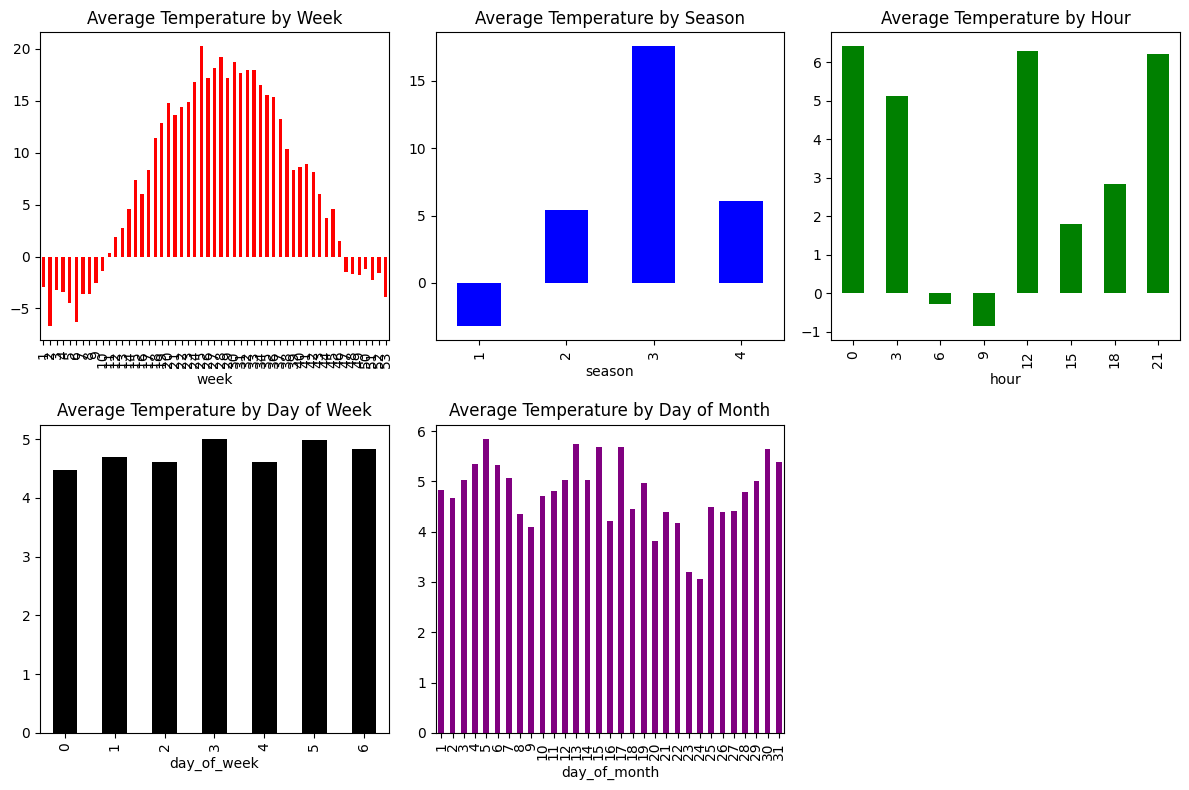

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Приведем столбец 'datetime_x' к типу datetime, если он еще не в таком формате
dark_twilight_incidents['datetime_x'] = pd.to_datetime(dark_twilight_incidents['datetime_x'])

# Создаем новые столбцы для недели, сезона, часа, дня недели и дня месяца
dark_twilight_incidents['week'] = dark_twilight_incidents['datetime_x'].dt.week
dark_twilight_incidents['season'] = (dark_twilight_incidents['datetime_x'].dt.month%12 + 3)//3
dark_twilight_incidents['hour'] = merged_df['datetime_x'].dt.hour
dark_twilight_incidents['day_of_week'] = dark_twilight_incidents['datetime_x'].dt.dayofweek
dark_twilight_incidents['day_of_month'] = dark_twilight_incidents['datetime_x'].dt.day

# Группируем данные по уникальным значениям этих параметров и находим среднюю температуру
avg_temp_by_week = dark_twilight_incidents.groupby('week')['temperature'].mean()
avg_temp_by_season = dark_twilight_incidents.groupby('season')['temperature'].mean()
avg_temp_by_hour = dark_twilight_incidents.groupby('hour')['temperature'].mean()
avg_temp_by_day_of_week = dark_twilight_incidents.groupby('day_of_week')['temperature'].mean()
avg_temp_by_day_of_month = dark_twilight_incidents.groupby('day_of_month')['temperature'].mean()

# Строим графики
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
avg_temp_by_week.plot(kind='bar', title='Average Temperature by Week',color = 'r')
plt.subplot(2, 3, 2)
avg_temp_by_season.plot(kind='bar', title='Average Temperature by Season',color = 'blue')
plt.subplot(2, 3, 3)
avg_temp_by_hour.plot(kind='bar', title='Average Temperature by Hour',color = 'g')
plt.subplot(2, 3, 4)
avg_temp_by_day_of_week.plot(kind='bar', title='Average Temperature by Day of Week',color = 'black')
plt.subplot(2, 3, 5)
avg_temp_by_day_of_month.plot(kind='bar', title='Average Temperature by Day of Month',color = 'purple')
plt.tight_layout()
plt.show()

In [43]:
dark_twilight_incidents.describe()

,year,month,temperature,atmospheric pressure,humidity,Wind speed,cloudiness,id,dead_count,injured_count,participants_count,holiday,week,season,hour,day_of_week,day_of_month
count,14268.000000,14268.000000,14268.000000,14268.000000,14268.000000,14268.000000,14268.000000,1.426800e+04,14268.000000,14268.000000,14268.000000,14268.000000,14268.000000,14268.000000,14268.000000,14268.000000,14268.000000
mean,2019.069456,7.177951,4.738860,761.730348,79.036809,1.824956,0.685093,1.843357e+06,0.059083,1.155172,2.444982,0.285955,29.395571,2.549692,12.741590,3.006658,15.849383
std,1.341368,3.852826,8.913952,8.163000,15.285465,1.726557,0.401562,4.599955e+05,0.257119,0.614676,0.908123,0.451884,16.847273,1.264483,8.806791,1.992528,8.743534
min,2017.000000,1.000000,-27.700000,724.700000,19.000000,0.000000,0.000000,1.527478e+06,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2018.000000,3.000000,-1.000000,756.700000,71.000000,1.000000,0.400000,1.542512e+06,0.000000,1.000000,2.000000,0.000000,12.000000,1.000000,3.000000,1.000000,8.000000
50%,2019.000000,8.000000,3.100000,761.500000,83.000000,1.000000,0.950000,1.558912e+06,0.000000,1.000000,2.000000,0.000000,34.000000,3.000000,18.000000,3.000000,16.000000
75%,2020.000000,11.000000,11.400000,766.800000,91.000000,3.000000,1.000000,2.498077e+06,0.000000,1.000000,3.000000,1.000000,45.000000,4.000000,21.000000,5.000000,23.000000
max,2021.000000,12.000000,32.000000,787.400000,100.000000,13.000000,1.000000,2.648997e+06,4.000000,12.000000,13.000000,1.000000,53.000000,4.000000,21.000000,6.000000,31.000000


In [19]:
dark_twilight_incidents.columns

Index(['join_key', 'datetime_x', 'year', 'month', 'region_x', 'temperature',
       'atmospheric pressure', 'humidity', 'Direction of the wind',
       'Wind speed', 'cloudiness', 'weather conditions', 'datetime_round',
       'id', 'light', 'point', 'pogoda_region', 'region_y', 'address',
       'category', 'datetime_y', 'severity', 'dead_count', 'injured_count',
       'parent_region', 'participants_count', 'holiday'],
      dtype='object')

In [25]:
columns = ['join_key', 'datetime_x', 'year', 'pogoda_region', 'region_x','region_y', 'address', 'category', 'datetime_y', 'datetime_round', 'id','dead_count', 'injured_count', 'parent_region', 
           'participants_count', 'point','light','holiday','week','season','hour','day_of_week','day_of_month']
dark_twilight_incidents_new = dark_twilight_incidents.drop(columns=columns)
dark_twilight_incidents_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14265 entries, 0 to 35018
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  14265 non-null  int64  
 1   temperature            14261 non-null  float64
 2   atmospheric pressure   14265 non-null  float64
 3   humidity               14260 non-null  float64
 4   Direction of the wind  14265 non-null  object 
 5   Wind speed             14262 non-null  float64
 6   cloudiness             14265 non-null  float64
 7   weather conditions     11236 non-null  object 
 8   severity               14265 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.1+ MB


In [26]:
label_endcoder = LabelEncoder()

for i in dark_twilight_incidents_new.columns:
 if type(dark_twilight_incidents_new[i][0]) == str:
     dark_twilight_incidents_new[i] = label_endcoder.fit_transform(dark_twilight_incidents_new[i])

dark_twilight_incidents_new

,month,temperature,atmospheric pressure,humidity,Direction of the wind,Wind speed,cloudiness,weather conditions,severity
0,1,0.9,755.2,96.0,5,1.0,1.00,19,0
1,1,1.7,751.0,96.0,5,1.0,1.00,6,0
2,1,1.1,761.2,80.0,12,0.0,1.00,0,2
3,1,0.2,761.3,90.0,12,0.0,1.00,19,0
5,1,-4.4,768.5,86.0,13,1.0,1.00,19,0
...,...,...,...,...,...,...,...,...,...
35013,12,0.0,746.3,93.0,5,6.0,1.00,66,0
35015,12,1.0,744.7,93.0,5,6.0,1.00,94,2
35016,12,2.0,744.0,87.0,5,6.0,0.75,94,0
35017,12,2.0,744.7,87.0,5,6.0,1.00,94,0


In [80]:
X = dark_twilight_incidents_new.drop(columns=['severity'], axis = 1)
y = dark_twilight_incidents_new['severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression


# Инициализируем модель
ridge = Ridge(alpha=1, random_state=1)

ridge.fit(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7302032235459005

In [86]:

model = LogisticRegression(max_iter = 800)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


classification_report_output = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

C:\Users\alex1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alex1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alex1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

0.7302032235459005

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    scoring='accuracy',
    cv=cv,
    verbosity=2,
    random_state=1,
    n_jobs=-1
)

In [51]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7290171616442394

Generation 2 - Current best internal CV score: 0.7290171616442394

Generation 3 - Current best internal CV score: 0.7290171616442394

Generation 4 - Current best internal CV score: 0.7290463757838829

Generation 5 - Current best internal CV score: 0.7290463757838829

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.01, max_depth=6, min_child_weight=20, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

In [106]:
from xgboost import XGBClassifier
trot = XGBClassifier( learning_rate=0.5, max_depth=3, min_child_weight=20, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0,random_state=42)
trot.fit(X_train, y_train)
y_pred = trot.predict(X_test)


classification_report_output = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

C:\Users\alex1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alex1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alex1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

0.7270497547302032

In [83]:
from sklearn.tree import DecisionTreeClassifier
Decision = DecisionTreeClassifier( max_depth=2, min_samples_leaf=11, min_samples_split=15)
Decision.fit(X_train, y_train)
y_pred = Decision.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7302032235459005


In [32]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

catboost = CatBoostClassifier(loss_function='MultiClass', iterations=400, learning_rate=0.12, depth=5)

catboost.fit(X_trai, y_train, verbose=100)

# Получаем предсказания для тестовых данных
y_pred = catboost.predict(X_test)

# Рассчитываем точность
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

0:	learn: 1.0151254	total: 2.85ms	remaining: 1.14s
100:	learn: 0.6750329	total: 262ms	remaining: 777ms
200:	learn: 0.6446824	total: 516ms	remaining: 510ms
300:	learn: 0.6192778	total: 769ms	remaining: 253ms
399:	learn: 0.5968389	total: 1.01s	remaining: 0us
Accuracy: 0.7291520672740014


In [109]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=42, n_estimators = 200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7302032235459005


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7056762438682551


In [48]:
# обучение модели на основе градиентного бустинга

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import make_scorer

# Создайте модель градиентного бустинга
model = GradientBoostingClassifier()  # Можете настраивать количество деревьев и другие параметры
parameters = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}

# Обучение модели с использованием GridSearchCV
grid_search = GridSearchCV(model, parameters, scoring={'accuracy': make_scorer(accuracy_score)}, refit='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Получение результатов
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Оценка на тестовых данных

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7302032235459005


In [93]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy_gb}')

Accuracy: 0.7193412754029432


In [111]:
import shap
explainer_your_model = shap.Explainer(Decision)
shap_values_your_model = explainer_your_model.shap_values(X_test)

# SHAP для TPOT модели
explainer_tpot = shap.Explainer(trot)
shap_values_tpot = explainer_tpot.shap_values(X_test)

[20:18:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


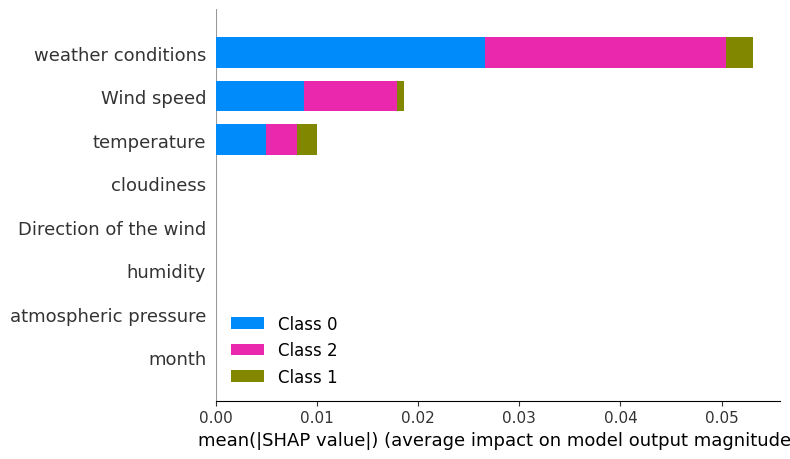

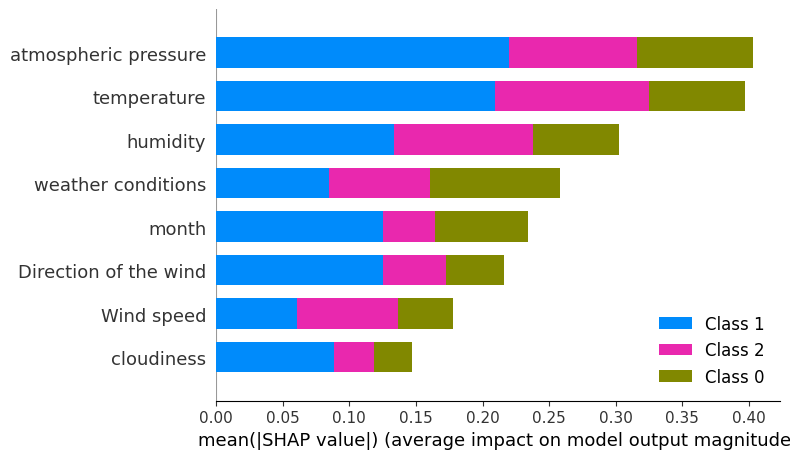

In [112]:
# График для нашей модели
shap.summary_plot(shap_values_your_model, X_test, plot_type="bar")

# График для TPOT модели
shap.summary_plot(shap_values_tpot, X_test, plot_type="bar")

In [119]:
X

,month,temperature,atmospheric pressure,humidity,Direction of the wind,Wind speed,cloudiness,weather conditions
0,1,0.9,755.2,96.0,5,1.0,1.00,19
1,1,1.7,751.0,96.0,5,1.0,1.00,6
2,1,1.1,761.2,80.0,12,0.0,1.00,0
3,1,0.2,761.3,90.0,12,0.0,1.00,19
5,1,-4.4,768.5,86.0,13,1.0,1.00,19
...,...,...,...,...,...,...,...,...
35013,12,0.0,746.3,93.0,5,6.0,1.00,66
35015,12,1.0,744.7,93.0,5,6.0,1.00,94
35016,12,2.0,744.0,87.0,5,6.0,0.75,94
35017,12,2.0,744.7,87.0,5,6.0,1.00,94


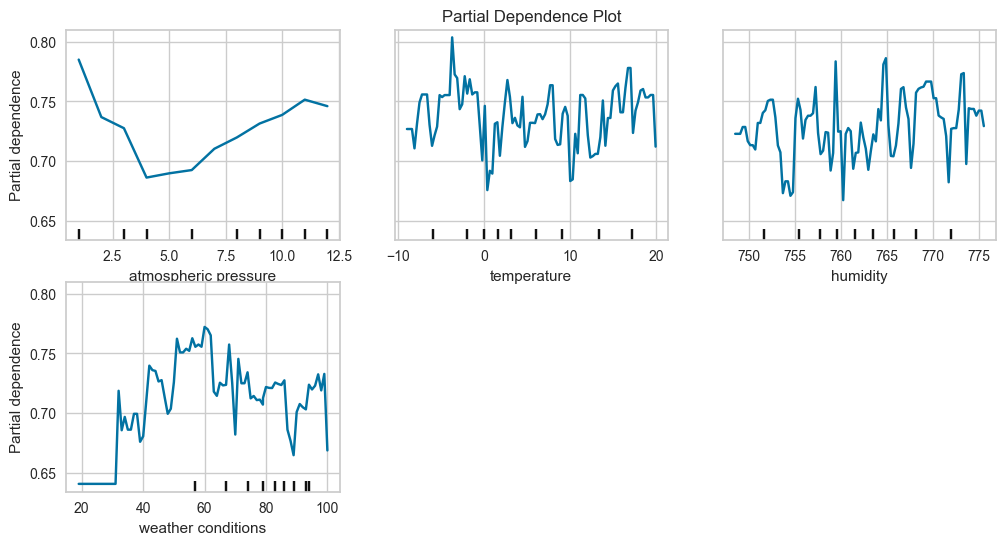

In [141]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

display = PartialDependenceDisplay.from_estimator(
    trot, X, ["atmospheric pressure", "temperature",'humidity','weather conditions'], feature_names=['atmospheric pressure', 'temperature','humidity','weather conditions'], ax=ax
    ,target=0
)


ax.set_title("Partial Dependence Plot")

plt.show()

In [113]:
dark_twilight_incidents_new.columns

Index(['month', 'temperature', 'atmospheric pressure', 'humidity',
       'Direction of the wind', 'Wind speed', 'cloudiness',
       'weather conditions', 'severity'],
      dtype='object')

[20:42:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


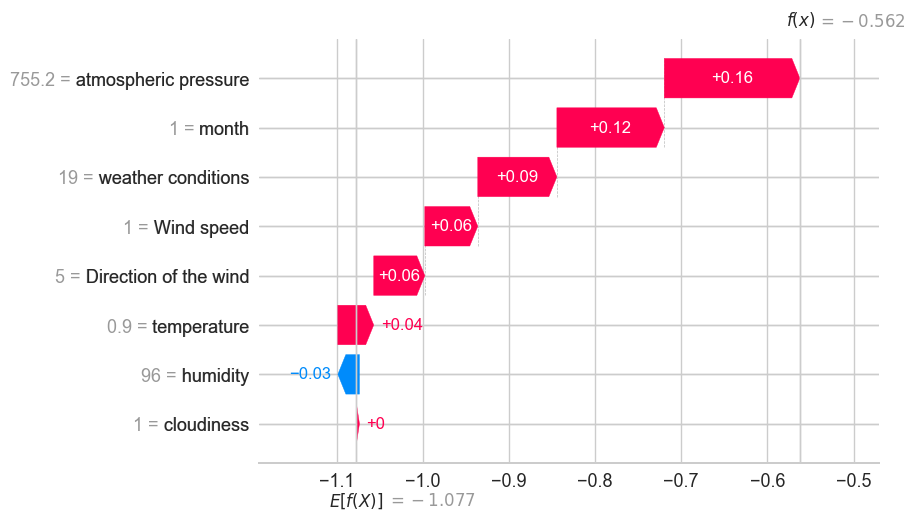

In [150]:
min_temp_index = merged_df['temperature'].idxmin()

explainer = shap.TreeExplainer(trot)
explanation = explainer(X)

# two new lines
explanation.values = explanation.values[:,:,0]
explanation.base_values = explanation.base_values[0,1]

shap.plots.waterfall(explanation[0])

[20:43:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


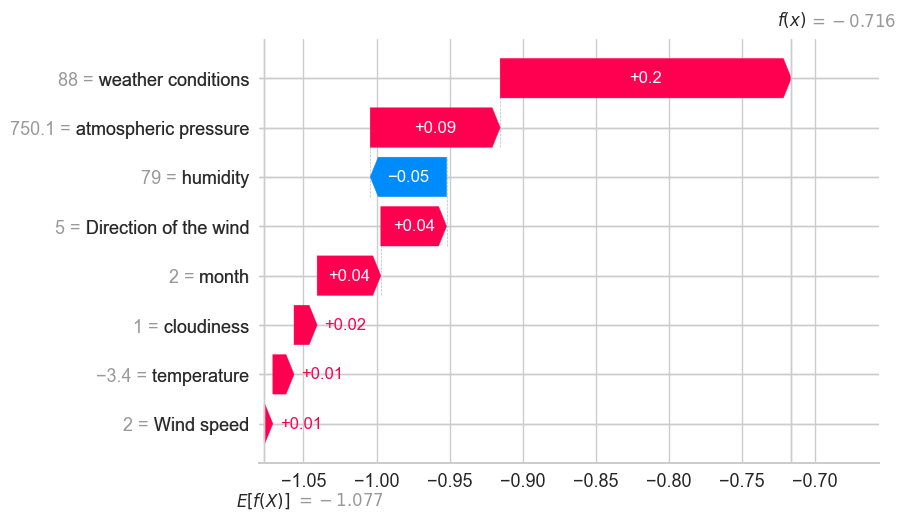

In [154]:
max_temp_index = merged_df['temperature'].idxmax()

explainer = shap.TreeExplainer(trot)
explanation = explainer(X)

# two new lines
explanation.values = explanation.values[:,:,0]
explanation.base_values = explanation.base_values[0,1]

shap.plots.waterfall(explanation[20])